# 0.Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

sns.set_style("darkgrid")

# 3. Data Exploring

## 3.1. Khám phá dữ liệu trong từng cột

In [2]:
df = pd.read_csv("../data/imdb_clean.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3


### 3.1.1. Cột `Date`

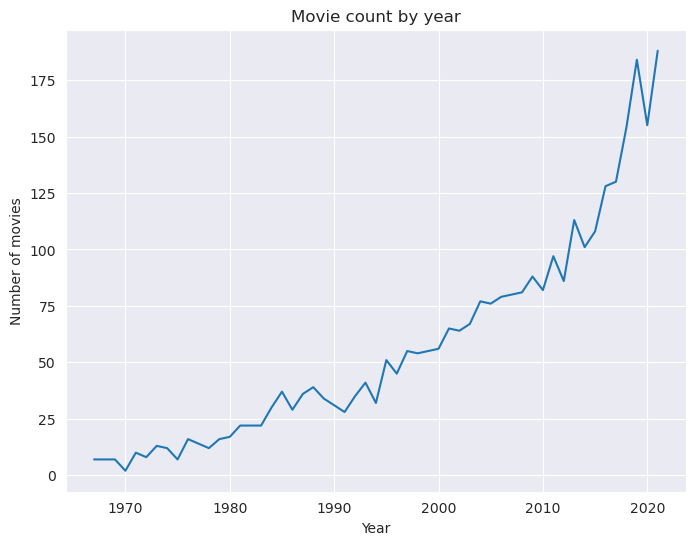

In [36]:
df_date = df.groupby('Date').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
plt.plot(df_date['Date'], df_date['Count'])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movie count by year')
plt.show()

Dựa trên biểu đồ phân bố số lượng phim sản xuất theo năm, chúng ta có thể thấy rằng số lượng phim sản xuất trong các năm gần đây tăng lên đáng kể, đặc biệt là trong khoảng thời gian từ năm 2000 trở đi. Trong khi đó, số lượng phim sản xuất trong các năm trước đó tương đối thấp.

Ngoài ra, chúng ta cũng có thể nhận thấy một sự tăng trưởng nhanh chóng của ngành công nghiệp điện ảnh trong thế kỷ 21, có thể là do sự phát triển của công nghệ và việc phổ biến của các phương tiện truyền thông, giúp các bộ phim được tiếp cận và quảng bá tốt hơn.

### 3.1.2. Cột `Duaration`

Text(0.5, 1.0, 'Distribution of movie duration')

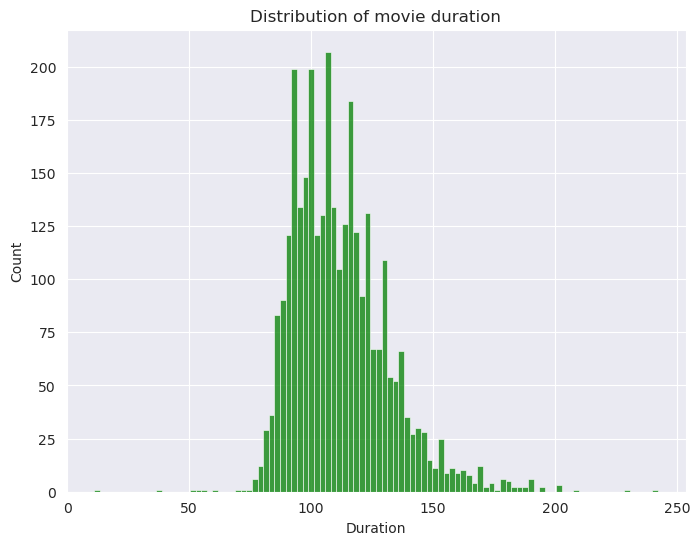

In [38]:
# Code here (hisplot)
fig = plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins = 100, color="green")
plt.title("Distribution of movie duration")

Dựa trên biểu đồ phân bố thời lượng phim sản xuất, chúng ta có thể thấy rằng phần lớn các bộ phim có thời lượng trong khoảng từ 80 đến 140 phút. Có một số bộ phim rất dài (từ 180 đến 400 phút) nhưng chúng khá hiếm trong số các bộ phim được sản xuất. Điều này cho thấy rằng, trong ngành công nghiệp điện ảnh, thời lượng phim không thể quá ngắn hoặc quá dài để có thể thu hút được sự chú ý của khán giả.

### 3.1.3. Cột `Votes`

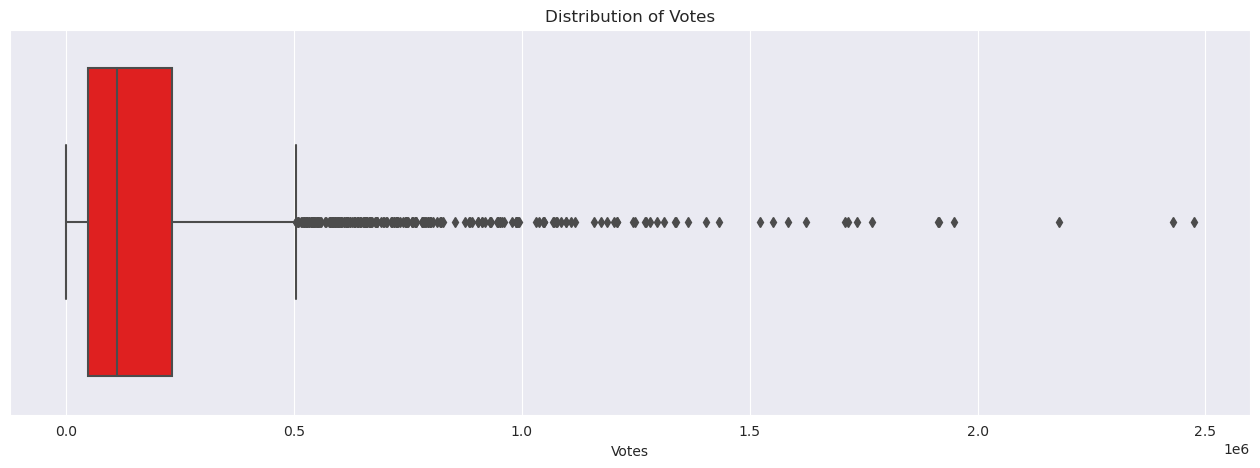

In [39]:
# Code here (hisplot) Ở trên xài hist rồi thì có thể xài boxplot ở đây
import seaborn as sns

plt.figure(figsize=(16,5))
sns.boxplot(x=df["Votes"], color="red")
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.show()


Dựa trên biểu đồ, ta có thể thấy rằng:

* Số phiếu bầu của các bộ phim phân bố rộng, từ khoảng 50 đến hơn 2 triệu phiếu bầu.
* Có rất nhiều outlier (những điểm dữ liệu nằm ngoài whiskers) trên đồ thị, cho thấy rằng có rất nhiều bộ phim đã thu hút được sự chú ý của một lượng lớn khán giả.
* Boxplot cũng cho thấy rằng trung vị (median) của số phiếu bầu cho các bộ phim rơi vào khoảng từ 5.000 đến 50.000 phiếu bầu.
* Sự phân bố của số phiếu bầu có xu hướng bị lệch phải, có nghĩa là có nhiều bộ phim đã nhận được số phiếu bầu cao hơn so với trung bình.

### 3.1.4. Cột `Rate`

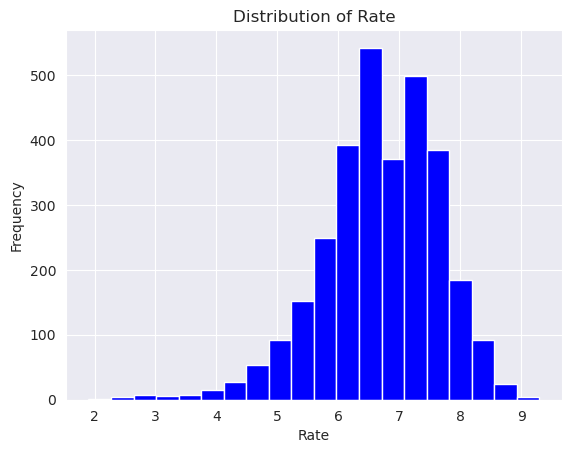

In [40]:
# Code here (chưa biết dùng gì nên dùng 2 cách)
plt.hist(df["Rate"], bins=20, color="blue")
plt.title("Distribution of Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()

Theo biểu đồ histogram, ta thấy phân bố đánh giá phim trên IMDb khá lệch về phía trung bình trên thang điểm 0-10, với đa số phim đạt điểm đánh giá từ 6 đến 8.

In [7]:
print(df['Rate'].describe())

count    3105.000000
mean        6.693655
std         0.961984
min         1.900000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: Rate, dtype: float64


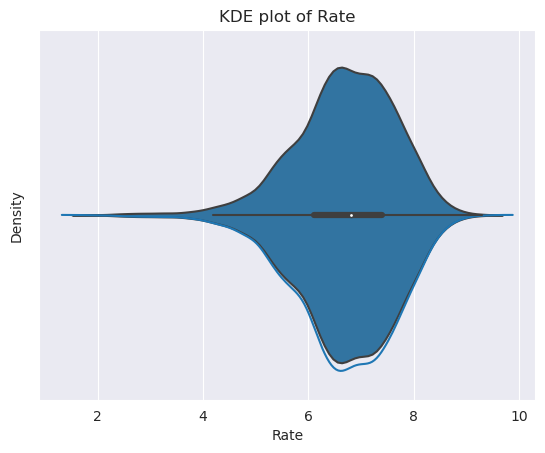

In [8]:
sns.kdeplot(data=df, x="Rate")
sns.violinplot(x=df["Rate"], inner="box")
plt.title("KDE plot of Rate")
plt.xlabel("Rate")
plt.show()

Biểu đồ KDE (Kernel Density Estimate) cũng cho thấy phân bố tương tự, với đỉnh đạt tại khoảng 7.0. Kết hợp với boxplot, ta thấy trung vị (median) của cột "Rate" là khoảng 6.8. Ta có thể thấy rằng phần lớn các phim trong bộ dữ liệu này được đánh giá từ trung bình đến cao trên IMDb.

### 3.1.5. Cột `Certificate`

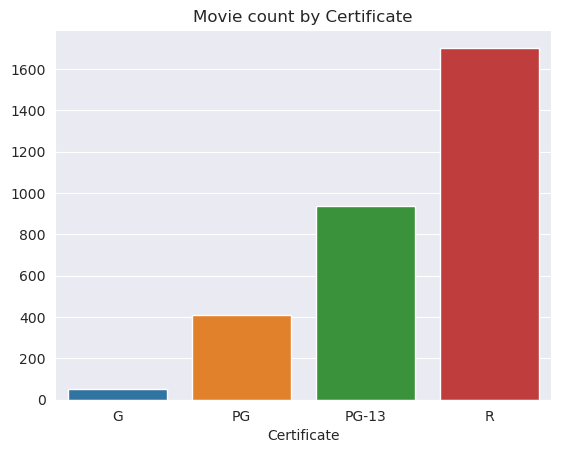

In [44]:
# Code here (countplot)
sns.countplot(x = df["Certificate"])
plt.ylabel("")
plt.title("Movie count by Certificate");


### 3.1.6. Cột `Nudity`, `Violence`, `Profanity`, `Alcohol`, `Frightening`

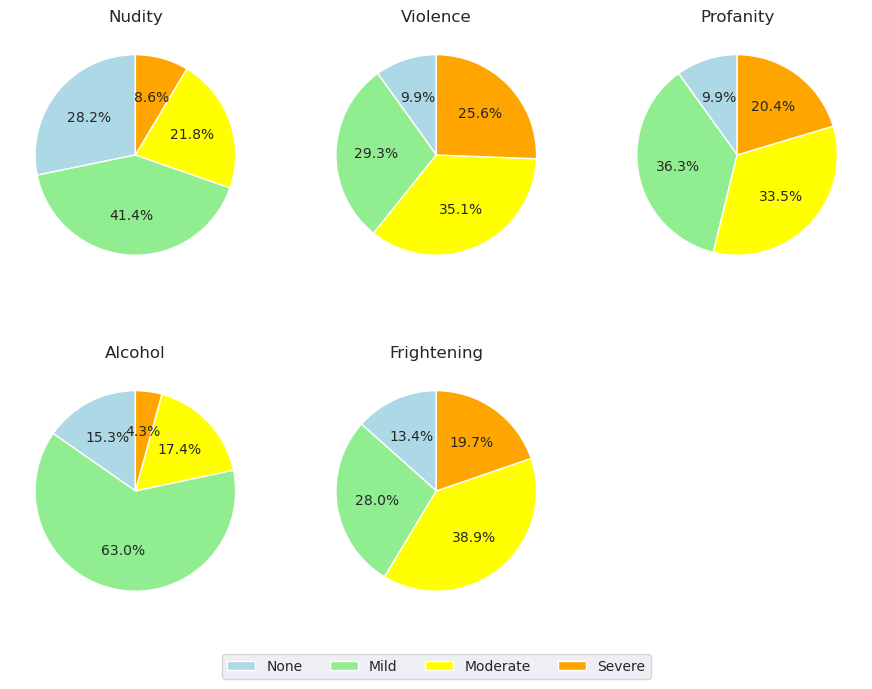

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(11, 8))

colors = ["lightblue", "lightgreen", "yellow", "orange"]
labels = ["None", "Mild", "Moderate", "Severe"]

for col, ax in zip(df.columns[7:12], axes.flatten()):
    data = df[[col]].value_counts().sort_index()
    ax.pie(data, colors = colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

axes[1, 1].legend(labels, loc="center", bbox_to_anchor=(0.5, -0.2), ncol=4)
fig.delaxes(axes[1, 2])

- Các phim có cảnh nóng ở mức nhẹ hoặc không có, nếu có thì đa số ở mức độ vừa phải
- Đa số phim có cảnh bạo lực (violence):
    - Số lượng phim có cảnh bạo lực nhẹ và vừa phải (Mild và Moderate) chiếm đa số, với khoảng 30 và 35% các phim trong dữ liệu có mức độ này.
    - Số lượng phim không có cảnh bạo lực (mức độ None) chiếm khoảng 10%.
- Tương tự các cảnh bạo lực, đa số các phim cũng chứa các cảnh chửi rủa (Profanity) ở mức độ nhẹ và vừa phải, chiểm lần lượt 33% và 36%
- Số lượng phim có cảnh có liên quan tới rượu bia (alcohol) nhẹ (mức độ Mild) và chiếm tỉ trọng nhất khoảng 63%. Các mức độ còn lại chiếm dưới 18% và khá ít phim chứa các cảnh liên quan tới rượu bia ở mức độ nặng (severe) chỉ khoảng 4%.
- Các cảnh gây sợ hãi (frightening) xuất hiện trong các phim ở mức độ khá tương tự với các cảnh bạo lực và chửi rủa.

### 3.1.11. Cột `Genre`

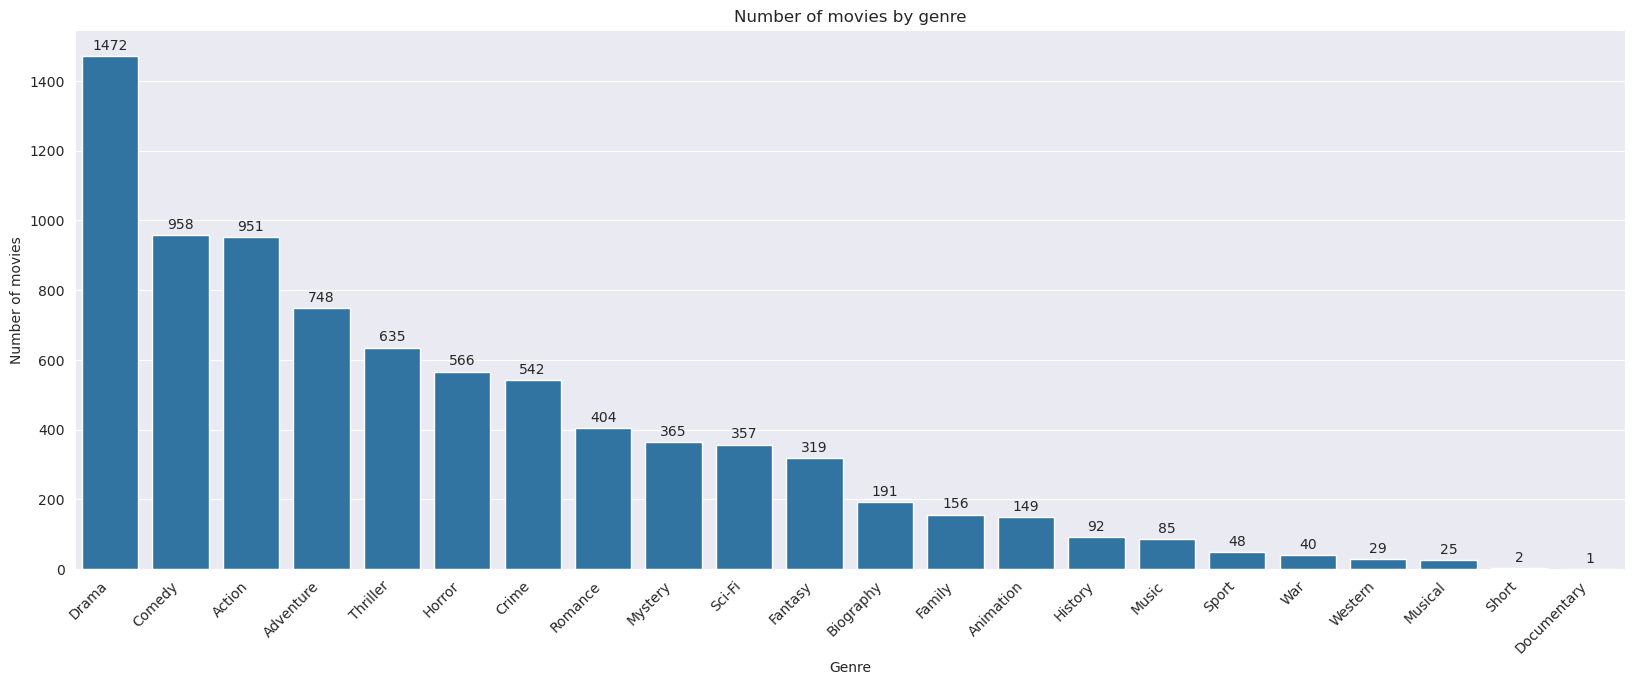

In [58]:
genres = pd.Series(list(set(np.concatenate(df["Genre"].str.split(", ").values))))
genres_count = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Name"].count())

plt.figure(figsize=(20, 7))
ax = sns.barplot(data = pd.DataFrame({"Genre": genres, "Count": genres_count}).sort_values("Count", ascending=False), x = "Genre", y = "Count", color = "C0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

for p in ax.patches:
    ax.annotate(f'{p.get_height():0.0f}', (p.get_x() + 0.4 , p.get_height() + 30), va = "center", ha = "center")

ax.set_title("Number of movies by genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of movies");

Các thể loại phim có phân bố không đồng đều, phần lớn phim được xếp vào các thể loại `"Drama"`, `"Comedy"`, `"Action"`, `"Adventure"`. Một số thể loại khác có ít phim là `"Sport"`, `"War"`, `"Western"`, `"Musical"`, `"Short"`, `"Documentary"`. Đặc biệt thể loại `"Documentary"` chỉ có 1 phim duy nhất

## 3.2. Mối quan hệ giữa các cột với nhau

### 3.2.1 `Rate` và `Date`

<AxesSubplot: title={'center': 'Average Rate by Year'}, xlabel='Date', ylabel='Rate'>

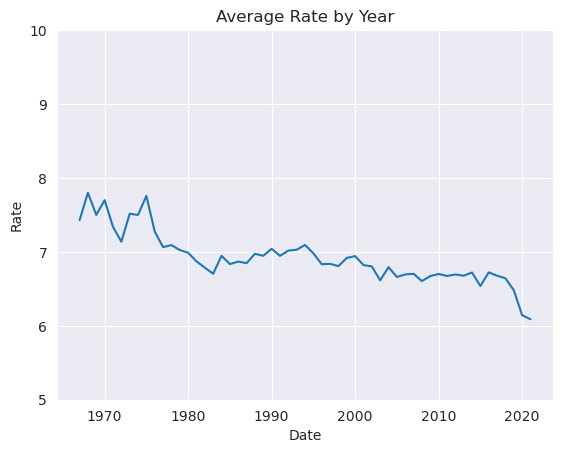

In [21]:
df.groupby("Date")["Rate"].mean().plot(ylabel="Rate", title="Average Rate by Year",ylim=(5,10))

- Điểm đánh giá trung bình các phim có xu hướng giảm xuống theo thời gian.
- Lí do có thể là tiêu chí đánh giá phim ngày một khắt khe hơn, người xem đang ngày một khó tính hơn, hoặc ngày càng có nhiều phim được sản xuất với chất lượng được đánh giá thấp.
- Điểm đánh giá trung bình cho từng nhãn phim sẽ được làm rõ hơn ở phần 3.2.5.

### 3.2.2 `Rate` và `Votes`

Text(0.5, 1.0, 'Relationship between Votes vs Rate')

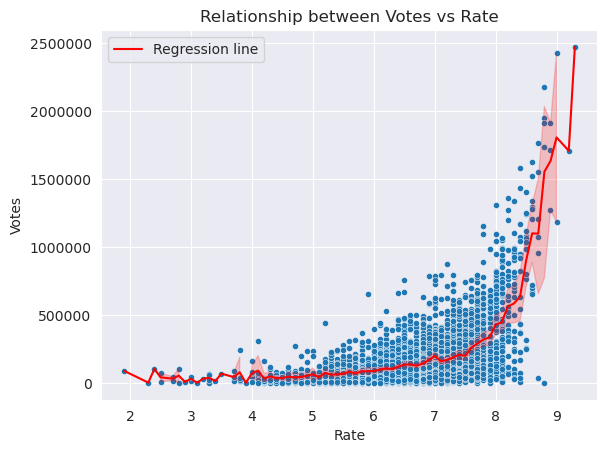

In [60]:
sns.scatterplot(x="Rate",y="Votes", data=df,s=20)
sns.lineplot(x="Rate",y="Votes", data=df, color="red", label = "Regression line").ticklabel_format(style='plain', axis='y')
plt.title("Relationship between Votes vs Rate")

- Những phim đạt điểm cao đến rất cao có rất nhiều lượng bình chọn, chứng tỏ rằng phim đó thực sự là bộ phim hay và rất được lòng đại chúng.
- Những phim có điểm thấp và trung bình thấp được ít lượt bình chọn hơn rõ rệt, cho thấy khán khả không mặn mà với những phim được đánh giá không cao, phần lớn chỉ xem và không đưa ra lượt đánh giá nào.

### 3.2.3 `Rate` và `Duration`

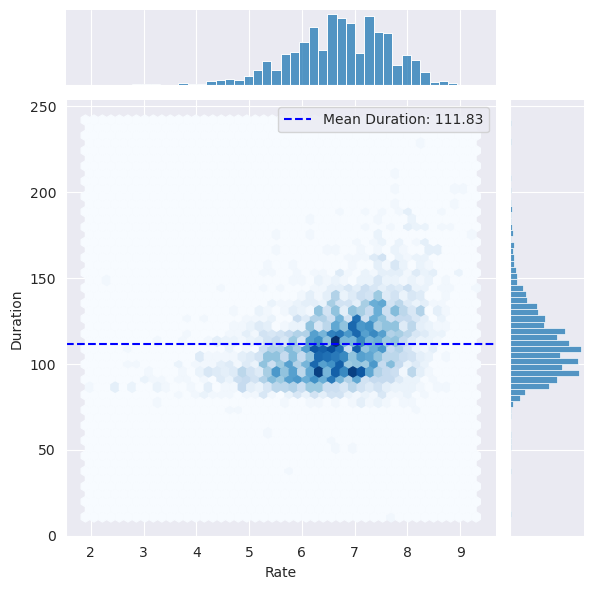

In [23]:
ax=sns.jointplot(x="Rate",y="Duration", data=df, kind="hex", cmap="Blues")
mean_duration=df["Duration"].mean()

ax.ax_joint.axhline(mean_duration, color='blue', linestyle='--', label=f"Mean Duration: {mean_duration:.2f}")
ax.ax_joint.legend()

- Phần lớn phim được sản xuất có thời lượng từ `90 phút` đến dưới `150 phút` (trung bình tổng thể là khoảng `111 phút`), ở mức thời lượng này có mức đánh giá khá từ `6.0` đến `7.0`. Có lẽ khoảng thời lượng này là thời lượng hợp lí, không quá dài dòng và đủ để truyền tải được thông điệp cho khán giả.
- Một số phim có thời lượng lớn hơn (từ trên `150 phút`) có điểm đánh giá cũng cao hơn mức trung bình (ở mức `7.0` đến `9.0`) tuy nhiên số lượng là không nhiều .

### 3.2.4 `Rate` và `Certificate`

Text(0.5, 1.0, 'Average Rate by Certificate')

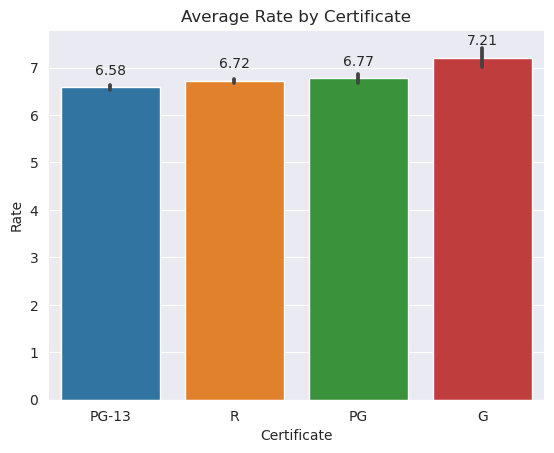

In [24]:
ax=sns.barplot(data=df,x="Certificate",y="Rate")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge",padding=7)
ax.set_title("Average Rate by Certificate")

- Điểm đánh giá trung bình của các thể loại phim chênh lệch nhau không nhiều. Các phim nhãn PG-13, R và PG có điểm đánh giá trung bình gần như ngang nhau, riêng phim có nhãn R có điểm trung bình cao hơn một chút (khoảng 7.21 điểm)

### 3.2.5 `Rate`, `Date` và `Certificate`

Text(0.5, 0, '')

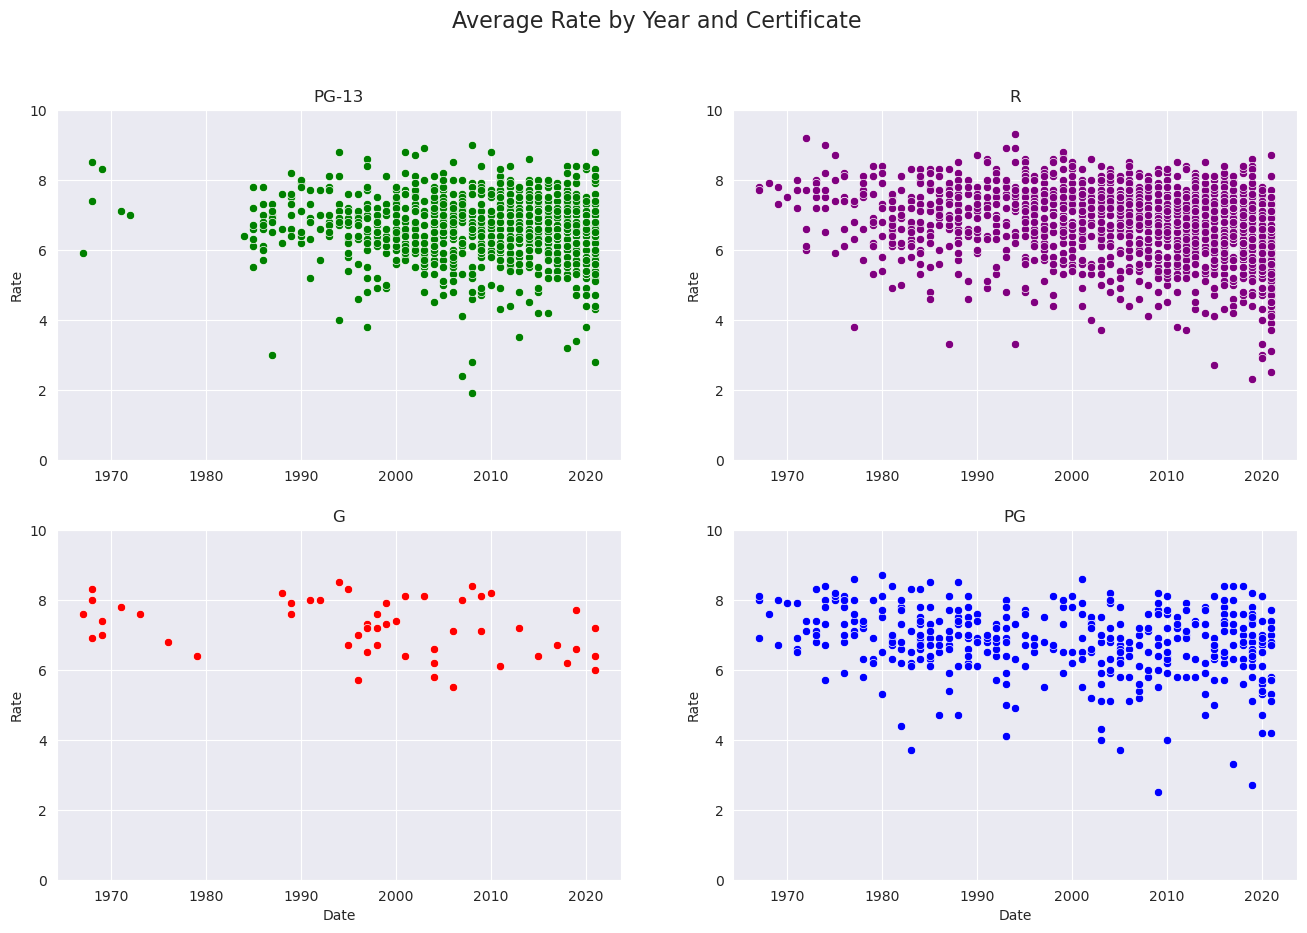

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Average Rate by Year and Certificate', fontsize=16)

sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG-13"], ax=axes[0,0],color="green")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="R"], ax=axes[0,1],color="purple")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="G"], ax=axes[1,0],color="red")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG"], ax=axes[1,1],color="blue")

axes[0,0].set_title("PG-13")
axes[0,1].set_title("R")
axes[1,0].set_title("G")
axes[1,1].set_title("PG")

axes[0,0].set_ylim(0,10)
axes[0,1].set_ylim(0,10)
axes[1,0].set_ylim(0,10)
axes[1,1].set_ylim(0,10)

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')


- Biểu đồ phân bố điểm đánh giá của từng phim theo các năm, được chia thành 4 loại nhãn (`PG-13`, `R`, `G`, `PG`).
- Dễ dàng nhận thấy số lượng phim `PG-13` (không khuyến khích cho trẻ dưới 13 tuổi) và phim `R` (không khuyến khích cho trẻ dưới 17 tuổi) có số lượng nhiều hơn hẳn so với các phim có nhãn `G` (dành cho mọi lứa tuổi) và `PG` (cân nhắc cho trẻ em). Cho thấy trẻ em ít được các nhà làm phim nhắm tới là đối tượng dành cho phim của mình.
- Nhìn vào biểu đồ của 2 nhãn phim phổ biến là `PG-13` và `R`, ta thấy càng về những năm gần đây, sự phân bố phim theo trục tung (điểm đánh giá) đang có xu hướng đồng đều và trải rộng ra hơn và số phim có điểm đánh giá cao vẫn duy trì ổn định. Có nghĩa là số luọng phim tăng theo các năm dẫn đến số lượng các phim đạt điểm thấp cũng tăng theo, làm điểm trung bình của các bộ phim trong năm đó bị giảm xuống, điều này cũng giải thích cho biểu đồ ở phần 3.1.

Text(0.5, 1.0, 'Average Rate by Year and Certificate')

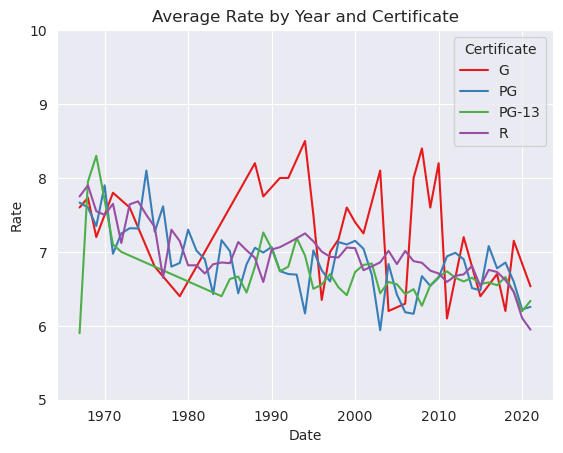

In [26]:
ax=sns.lineplot(x="Date",y="Rate",data=df.groupby(["Date","Certificate"])["Rate"].mean().to_frame(),hue="Certificate",palette="Set1")
ax.set_ylim(5,10)
ax.set_title("Average Rate by Year and Certificate")

- Điểm đánh giá trung bình của phim nhãn `G` không ổn định, một phần lí do có lẽ vì số lượng quá ít.
- Điểm trung bình của 3 loại nhãn còn lại có xu hướng giảm dần theo thời gian.

### 3.2.6 `Date`, `Rate` và `Votes`

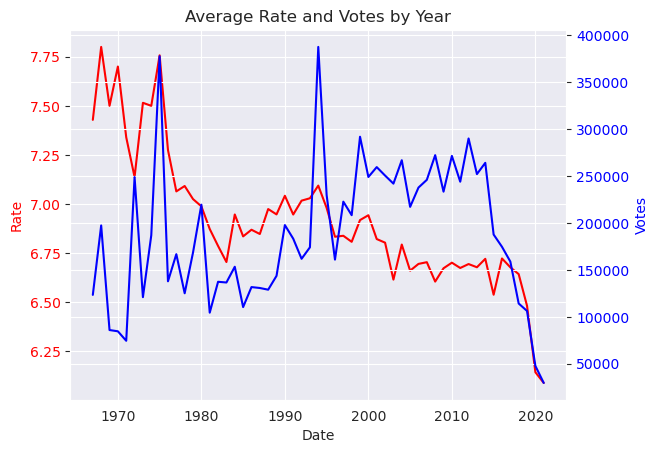

In [27]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Votes"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Votes by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Votes", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Votes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Như đã nói trên, điểm đánh giá đang có xu hướng giảm, ngược lại là số lượng bình chọn thì lại có xu hướng tăng.
- Tuy nhiên những năm gần đây cho thấy sự tụt giảm về cả điểm đánh giá và lượt bình chọn, đó là khoảng thời gian từ Covid-19 đến nay cho thấy đại dịch đã ảnh hưởng không nhỏ đến ngành điện ảnh.

### 3.2.7 `Date`, `Rate` và `Duration`

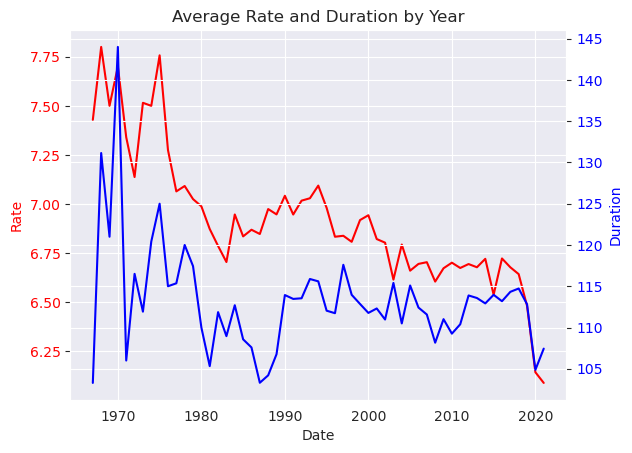

In [28]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Duration"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Duration by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Duration", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Duration', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Biểu đồ diễn tả mối liên hệ giữa điểm đánh giá trung bình và thời lượng trung bình qua các năm.
- Hai đường này có xu hướng khá giống nhau, có thể nói có sự tương quan với nhau. Từ đó nhóm có nhận xét thời lượng phim có ảnh hưởng đến điểm đánh giá của phim.

### 3.2.8. `Genre` với `Votes` và `Rate`

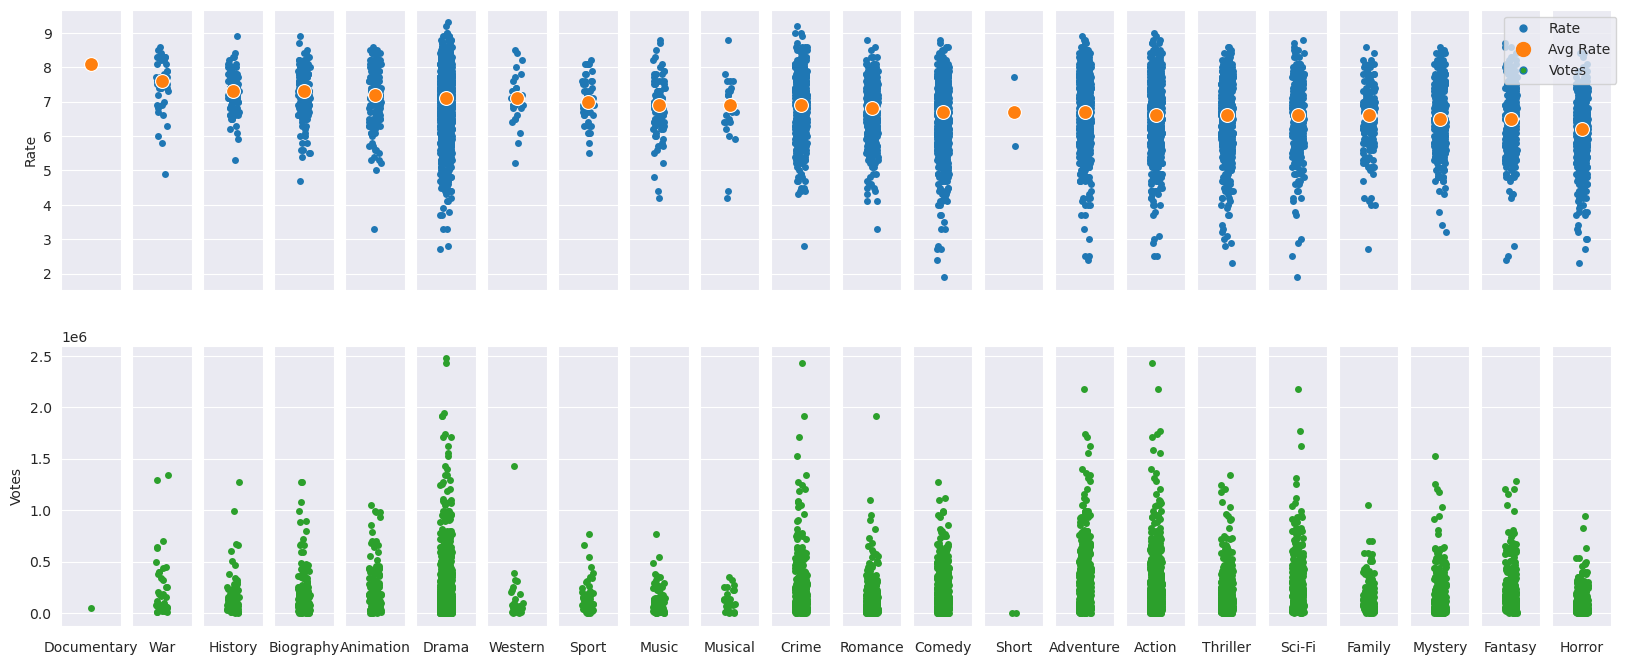

In [29]:
genres_agg = pd.DataFrame(
    {"Genre": genres, 
     "rate_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Rate"].median()),
     "vote_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Votes"].median()),
    }
).sort_values("rate_median", ascending = False).set_index("Genre")

order = genres_agg.index

fig, axes = plt.subplots(ncols = genres.shape[0], nrows = 2, figsize = (20, 8), sharey = "row", sharex = True)

for ax, genre in zip(axes[0], order):
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Rate"], ax = ax)
    sns.scatterplot(x = [0], y = genres_agg.loc[genre, "rate_median"], color = "C1", ax = ax, s = 100, zorder = 10)
    ax.set_ylabel("")
    ax.set_xlim(-0.5, 0.5)

for ax, genre in zip(axes[1], order):
    # sns.barplot(x = [0], y = [genres_agg.loc[genre, "vote_median"]], color = "C0", ax = ax)
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Votes"], ax = ax, color = "C2")
    ax.set_xticklabels([])
    ax.set_xlabel(genre)

axes[0, -1].legend(
    handles = [
        Line2D([0], [0], marker='o', lw = 0, label='Rate', markerfacecolor='C0', markersize=5),
        Line2D([0], [0], marker='o', lw = 0, label='Avg Rate', markerfacecolor='C1', markeredgecolor='C1', markersize=10),
        Line2D([0], [0], marker='o', lw = 0, label='Votes', markerfacecolor='C2', markersize=5),
    ],
    loc = "upper right", bbox_to_anchor = (1.2, 1)
)

# for ax in axes[1]:
#     #annnotate the median vote
#     ax.annotate(f'{genres_agg.loc[ax.get_xlabel(), "vote_median"]:0.0f}', (0, genres_agg.loc[ax.get_xlabel(), "vote_median"] + 10000), ha = "center")

# axes[1, 1].set_ylim(0, 320000)
axes[0, 0].set_ylabel("Rate")
axes[1, 0].set_ylabel("Votes");

Các thể loại có ít phim có phân bố điểm nhìn chung nhỉnh hơn các thể loại có nhiều phim. 

Nhìn vào số lượng vote và số lượng phim, các thể loại có số lượng ít như `"Documentary"`, `"Western"`, `"Sport"`, `"Musical"` hay `"Sport"` có ít lượng votes hơn, có thể do nhận được ít sự quan tâm hơn, do đó ít nhà sản xuất hơn, các nhà sản xuất đầu tư chỉn chu hơn vào bộ phim.

Còn đối với các thể loại có số lượng nhiều hơn như `"Crime"`, `"Drama"`, `"Adventure"`, `"Comedy"` có số lượng votes nhiều hơn, nghĩa là có nhiều sự quan tâm hơn, đồng nghĩa với với việc sẽ có nhiều nhà sản xuất các thể loại phim này. Khi số lượng nhà xuất suất tăng lên, chất lượng phim cũng sẽ dàn trải hơn, do đó ta thấy phân bố điểm của các thể loại này trải rộng hơn về phía dưới.

Tuy nhiên nhận xét trên chỉ là giả thuyết của nhóm, còn khá nhiều yếu tố khác ảnh hưởng đến điểm của từng thể loại phim.


### 3.2.9. `Genre` và `Certificate`

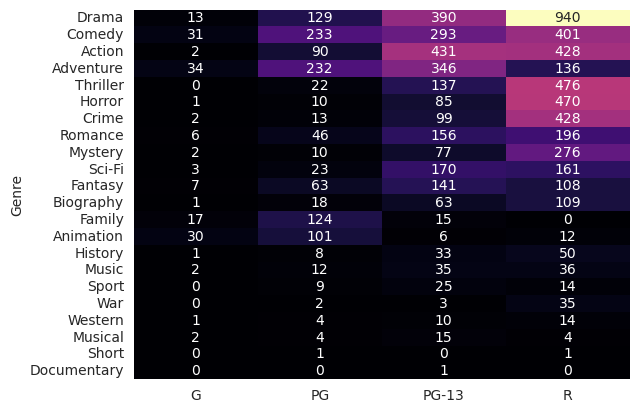

In [30]:
data = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Certificate"].value_counts()).fillna(0)
data["Genre"] = genres

data.set_index("Genre", inplace = True)

data["sum"] = data.sum(axis = 1)
data.sort_values("sum", ascending = False, inplace = True)

data = data[["G", "PG", "PG-13", "R"]]

sns.heatmap(data, cmap = "magma", annot = True, fmt = "0.0f", cbar = False);

Đa số các thể loại phim có phân bố ở các nhãn tăng dần theo hướng G -> PG -> PG-13 -> R (màu sáng dần từ trái sang phải), nghĩa là đa số đối tượng khán giả của đa số thể loại phim thuộc nhóm thanh thiếu niên trên 13/người lớn, như các thể loại `"Drama"`, `"Thriller"`, `"Horror"`. Một số thể loại có mức tập trung khác thường ở nhãn PG và PG-13 là `"Comedy"` và `"Adventure"`. Riêng 2 thể loại `"Animation"` và `"Family"` có đối tượng khán giả chính là trẻ em khi phần lớn phim có nhãn PG

### 3.2.10. `Genre` và `Date`

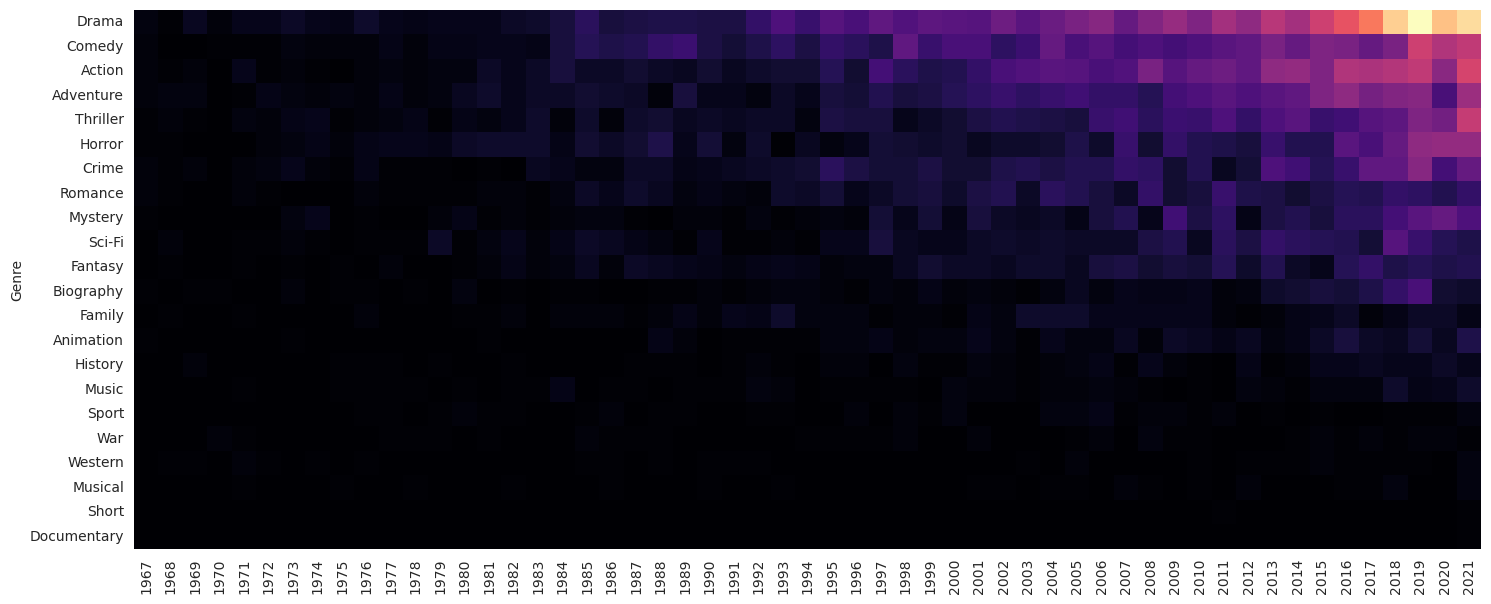

In [31]:
plt.figure(figsize=(20, 7))

data = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Date"].value_counts()).fillna(0)
data["Genre"] = genres

data.set_index("Genre", inplace = True)

data["sum"] = data.sum(axis = 1)
data.sort_values("sum", ascending = False, inplace = True)

data = data[list(range(1967, 2022))]

ax = sns.heatmap(data, cmap = "magma", cbar = False)
ax.set_aspect("equal")

Số lượng phim có xu hướng tăng dần theo thời gian ở đều các thể loại. Các thể loại xuất hiện từ sớm và đồng thời chiếm số lượng nhiều ở những năm gần đây là `"Drama"`, `"Action"`, `"Adventure"`, `"Horror"` và một số thể loại khác. 

Giai đoạn 1985 - 1995 các thể loại `"Action"` `"Adventure"` và một số thể loại gần kề khác trên heatmap có sự phân bố khá thát thường, thay đổi lên xuống liên tục.

Thể loại `"Family"` có những giai đoạn phát triển nhẹ trong quá khứ 1991 - 1993, 2003 - 2005, sau đó lụi tàn cho đến ngày nay.

Các phim thể loại `"Comedy"` xuất hiện nhiều giai đoạn 1983 - 1990, sau đó thay đổi khá thất thường tới 1998 và tăng trưởng dần đều đến ngày nay.

### 3.2.11. Các cột `Nudity`, `Violence`, `Alcohol`, `Profanity`, `Frightening`

In [32]:
sum = []
for i in range(len(df)):
    sum.append(df.Nudity[i] +df.Violence[i]  +df.Profanity[i]  +df.Alcohol[i]  +df.Frightening[i])

In [33]:
df.insert(loc = 12, column = 'Sum', value = sum)

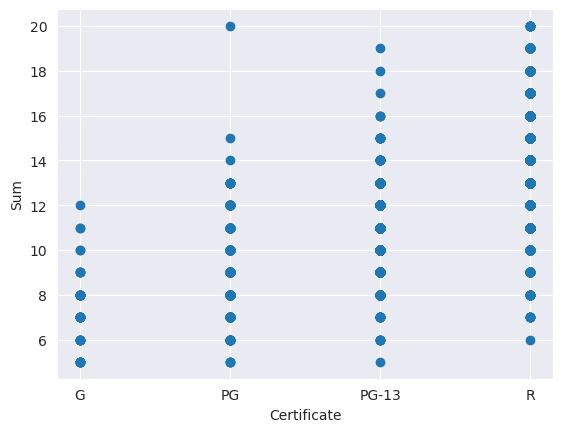

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a custom order for the x-axis elements
custom_order = ['G', 'PG', 'PG-13', 'R']

# Convert the x-axis column to a categorical data type with the custom order as its categories
df['Certificate'] = pd.Categorical(df['Certificate'], categories=custom_order)

# Sort the data based on the categorical x-axis column
sorted_data = df.sort_values('Certificate')

# Create a scatter plot of the sorted data
plt.scatter(sorted_data['Certificate'], sorted_data['Sum'])
plt.xlabel('Certificate')
plt.ylabel('Sum')
plt.show()


Tổng các giá trị Nudity, Violence, Profanity, Alcohol, Frightening của một phim càng cao thì khả năng nhận phân loại Certificate ở các mức cao (ví dụ R) sẽ nhiều hơn.

Text(0.5, 0.98, 'Sum of Certificate by Date')

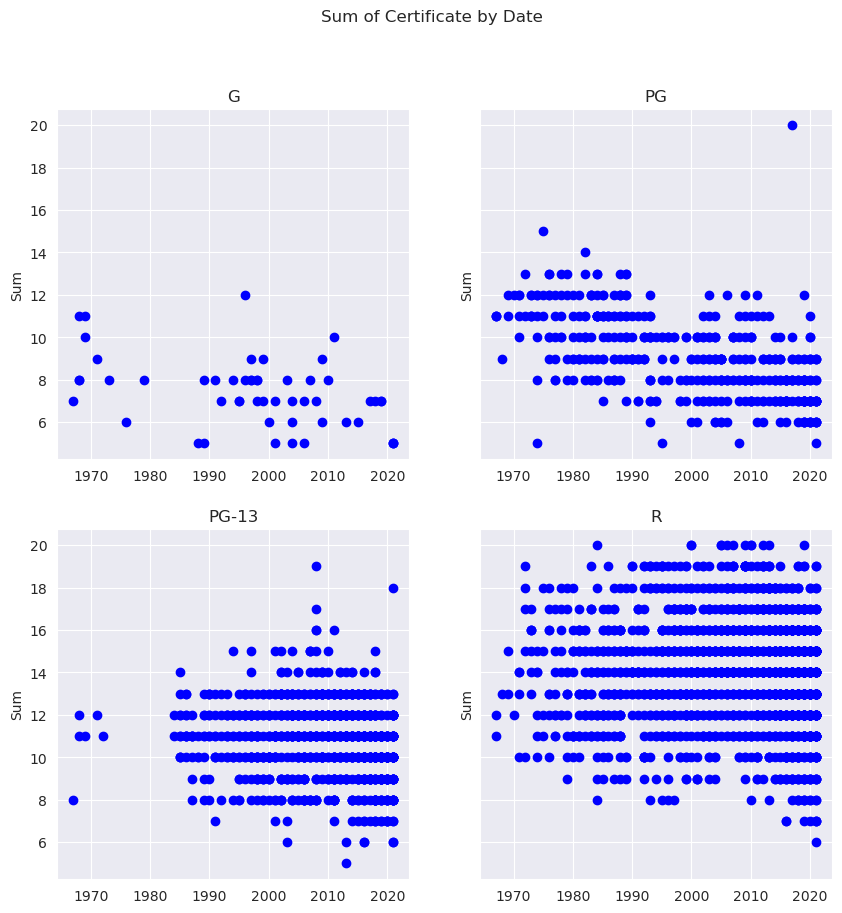

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

col = ['G', 'PG', 'PG-13', 'R']


for c, ax in zip(col, axes.flatten()):
    filtered_data = df[df['Certificate'] == c]
    ax.scatter(filtered_data['Date'], filtered_data['Sum'], color='blue', marker='o')
    ax.set_xlabel('')
    ax.set_ylabel('Sum')
    ax.set_title(c)

plt.suptitle('Sum of Certificate by Date')

Qua từng năm, phạm vi tổng điểm của Nudity, Violence, ... để đánh giá mức phân loại Certificate có xu hướng mở rộng ra (vừa cao hơn nhưng cũng có thể thấp điểm hơn). Nhãn R có xu hướng trải rộng nhất, nghĩa là có nhưng phim tuy các yếu tố giới hạn độ tuổi ở mức thấp nhưng vẫn chỉ dành cho khán giả trên 18 tuổi